In [15]:
import os


In [16]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [17]:
print(X)
print(Y)

[[0, 0], [1, 1]]
[0, 1]


In [18]:
clf.predict([[2., 2.]])

array([1])

In [19]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [20]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [21]:
import graphviz 
import os
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 



'iris.pdf'

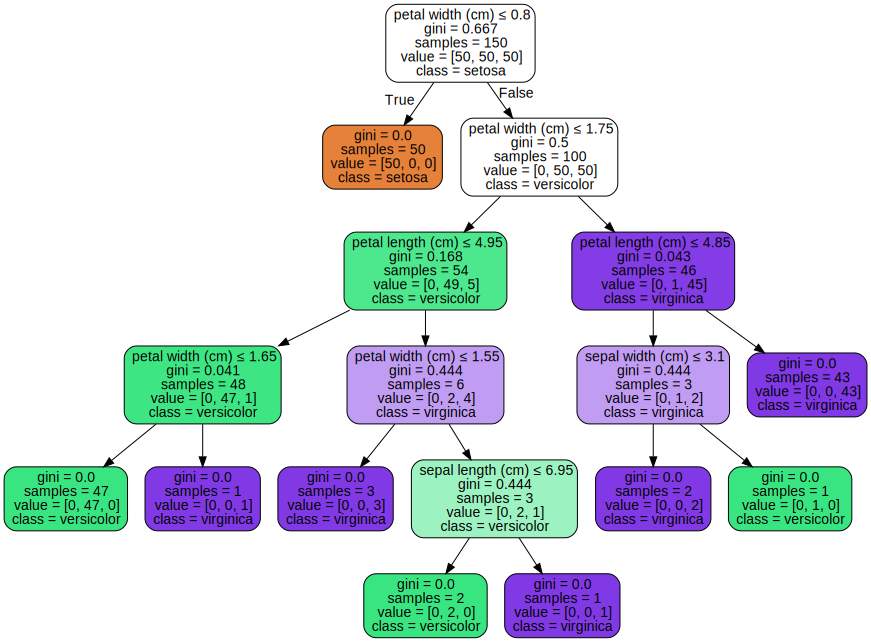

In [22]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [23]:
import pandas as pd
train = pd.read_csv('../data/diabetes_train.csv')
test = pd.read_csv('../data/diabetes_test.csv')
train.columns[:8]



Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8])


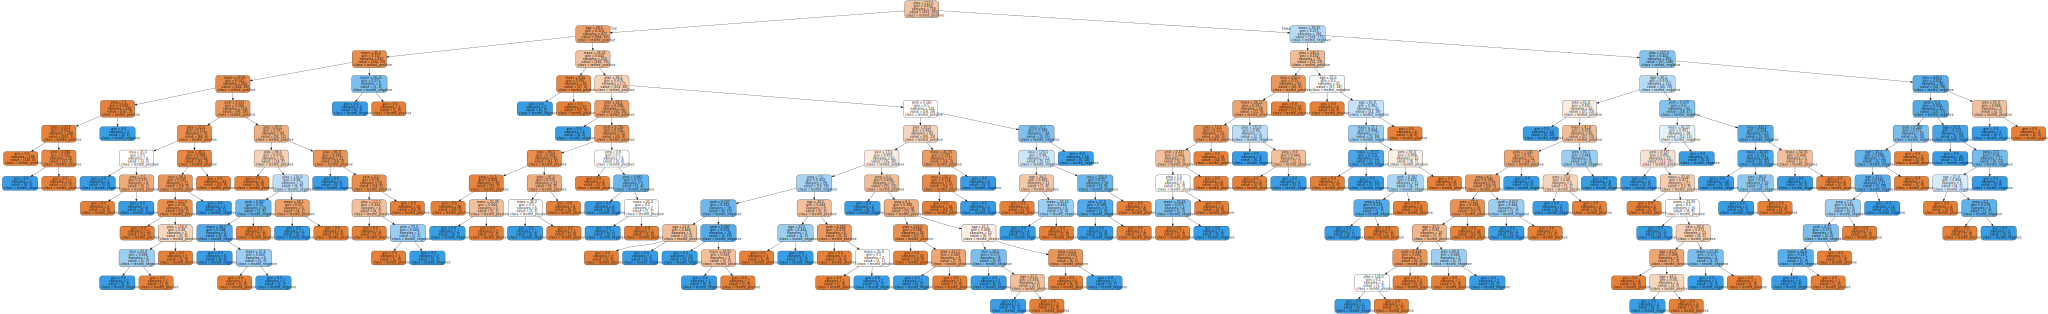

In [26]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=train.columns[:8],  
                     class_names=train.iloc[:,8],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
#graph.render("../data/diabetes_train")

In [27]:
y_pred = clf.predict(test.iloc[:,0:8])
y_pred

array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative'], dtype=object)

In [28]:
from sklearn.metrics import confusion_matrix
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp 

(7, 0, 1, 2)